# Trending YouTube Video Statistics Analysis

In questo documento viene analizzato il dataset "Trending YouTube Video Statistics" reperibile su Kaggle (https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv). 
In questo dataset sono contenute informazioni riguardo la sezione "Treding" di YouTube, ossia un elenco dei video di maggior tendenza sulla piattaforma.
Per determinare i video di tendenza dell'anno, YouTube utilizza una combinazione di fattori, tra cui la misurazione delle interazioni degli utenti (numero di visualizzazioni, condivisioni, commenti e "Mi piace"). È importante notare che i video presenti nella sezione "Trending" non sono i video più visto in generale in un anno, e che la sezione varia da nazione a nazione. Nel mio lavoro ho analizzato la sezione "Trending" degli USA.
Il dataset contiene i video che sono stati di maggior tendenza negli USA dal 14.11.2017 fino al 31.05.2018.

## importazione librerie e lettura del dataset

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import datetime
        
df = pd.read_csv("data/USvideos.csv")

### Prime informazioni sul dataset 

Una breve visione di come è strutturato il dataset

In [2]:
df

video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3         Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

Righe e colonne del dataset

#### Descrizione del dataset

di seguito vengono mostrati in breve alcuni dati rilevanti sul dataset per avere i primi risultati a colpo d'occhio

In [3]:
df.describe()

category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06

Questi dati mostrano in modo conciso alcune informazioni come il totale delle visualizzazioni, dei likes, dei dislikes e dei commenti. La loro media, il minimo e il massimo.

#### Informazioni sul dataset

di seguito le informazioni sul dataset quali il numero di righe, il numero di colonne e il loro nome.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de


Il dataset contiene 40949 righe e 16 colonne. 
Le colonne più interessanti che verranno analizzate in questo lavoro sono quelle relative alle date in cui un video è rimasto nella sezione di tendenza, i likes e dislikes, le views, le categorie dei video, i canali, i commenti e i tags.
È necessario fare una nota per quanto riguarda la colonna delle categorie dei video (category_id) che vengono inizialmente rappresentate come _int64_. Stando a quanto riportato su Kaggle le categorie dei video sono differenti a seconda della nazione, e per ognuna, è presente un file JSON dove vengono specificate a quale categoria corrisponde ogni numero. Verrà quindi eseguita una mappatura per avere le categorie espresse come stringhe invece che numero per una migliore leggibilità del dataset.
Un'altra nota è sul formato della colonna "trending_date", che viene fornita come tipo _object_. Per questa colonna verrà fatta una formattazione per rendere le date del formato adatto alle analisi.


Dal momento che un video può rimanere nella sezione dei tendenza per più giorni, lo stesso titolo è presente in più righe del dataset ma con dati diversi (più visualizzazioni, like, dislike e commenti). Per questo motivo l'analisi del dataset verrà suddivisa in due parti:

* Nella prima parte viene tenuto in considerazione il dataset intero (40949 righe) per andare ad analizzare le date in cui i video rimangono nella sezione trend.
* Nella seconda parte, per ogni video viene tenuta in considerazione la data più recente (ossia quella con i dati più recenti e "aggiornati") in questo modo si evita di compromettere le analisi nel caso di video che hanno numeri molto grandi.

### Mappatura categorie e formattazione date

In [5]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format="%y.%d.%m")

df["category_id"].replace({10:"Music", 24:"Entertainment", 22:"People & Blogs", 20:"Gaming", 23: "Comedy", 
                           1:"Film & Animations", 26:"Howto & Style", 17:"Movies", 28:"Science & Technology",
                           25:"News & Politics", 29:"Nonprofits & Activism", 27:"Education", 15:"Pets & Animals",
                           19:"Travel & Events", 2:"Autos & Vehicles", 43:"Shows"}, inplace = True)

### Creazione di nuove Serie con la prima e l'ultima data di tendenza

Per la prima parte dell'analisi vengono create due nuove Serie **dff** e **dfl**. (f = first, l = last).

La prima prende il primo giorno in cui un video entra nella sezione trend, mentre la seconda prende l'ultimo giorno in cui un video è nella sezione trend. In questo modo, per ogni video, è possibile calcolare quante visualizzazioni, likes, dislikes, ecc. ha ottenuto durante la permanenza nella sezione di tendenza.

In [6]:
dfl = df.sort_values("trending_date", ascending=False).groupby("video_id").head(1)
dff = df.sort_values("trending_date", ascending=False).groupby("video_id").tail(1)

dfl = dfl.sort_values("video_id")
dff = dff.sort_values("video_id")

### Aggiunta di colonne "delta" su dataset con data finale

Per ogni colonna numerica è possibile calcolare un "delta", ossia la quantità (di visualizzazioni, likes, dislikes, ecc.) che ha ottenuto durante il periodo di tendenza.
Queste nuove informazioni vengono inserite nella Serie originale, e viene creata una nuova colonna "delta" per le informazioni interessanti (es. _views_delta_, _likes_delta_, _comment_count_delta_, ecc.) 

In [7]:
dfl = dfl.reset_index()
dff = dff.reset_index()
    
dfl.loc[(dfl['views'] - dff['views']) != 0, 'views_delta'] = dfl['views'] - dff['views']
dfl.loc[dfl['likes'] - dff['likes'] > 0, 'likes_delta'] = dfl['likes'] - dff['likes'] 
dfl.loc[dfl['dislikes'] - dff['dislikes'] > 0, 'dislikes_delta'] = dfl['dislikes'] - dff['dislikes']
dfl.loc[dfl['comment_count'] - dff['comment_count'] > 0, 'comment_count_delta'] = dfl['comment_count'] - dff['comment_count']

dfl = dfl.fillna(0)

df["views_delta"] = dfl["views_delta"]
df["likes_delta"] = dfl["likes_delta"]
df["dislikes_delta"] = dfl["dislikes_delta"]
df["comment_cout_delta"] = dfl["comment_count_delta"]

dfl.loc[(dfl['trending_date'] - dff['trending_date']) != 0 , 'trending_days'] = (dfl['trending_date'] - dff['trending_date']) + datetime.timedelta(days=1)
dfl["trending_days"] = (dfl["trending_days"] / np.timedelta64(1, 'D')).astype(int)

# Prima parte (dataset completo)

## Numero medio di giorni in cui un video rimane trend

In [8]:
dfl["trending_days"].mean()

6.762399622106755

In media negli USA i video di tendenza rimangono tali per poco meno di una settimana. 

## Distribuzione del numero di giorni in cui un video è di tendenza

In questo grafico viene mostrata per quanto tempo i video rimangono di tendenza.
Sull'asse delle ordinate è mostrato il numero totale di video, sull'asse delle ascisse il numero di giorni di permanenza nella sezione di tendenza.

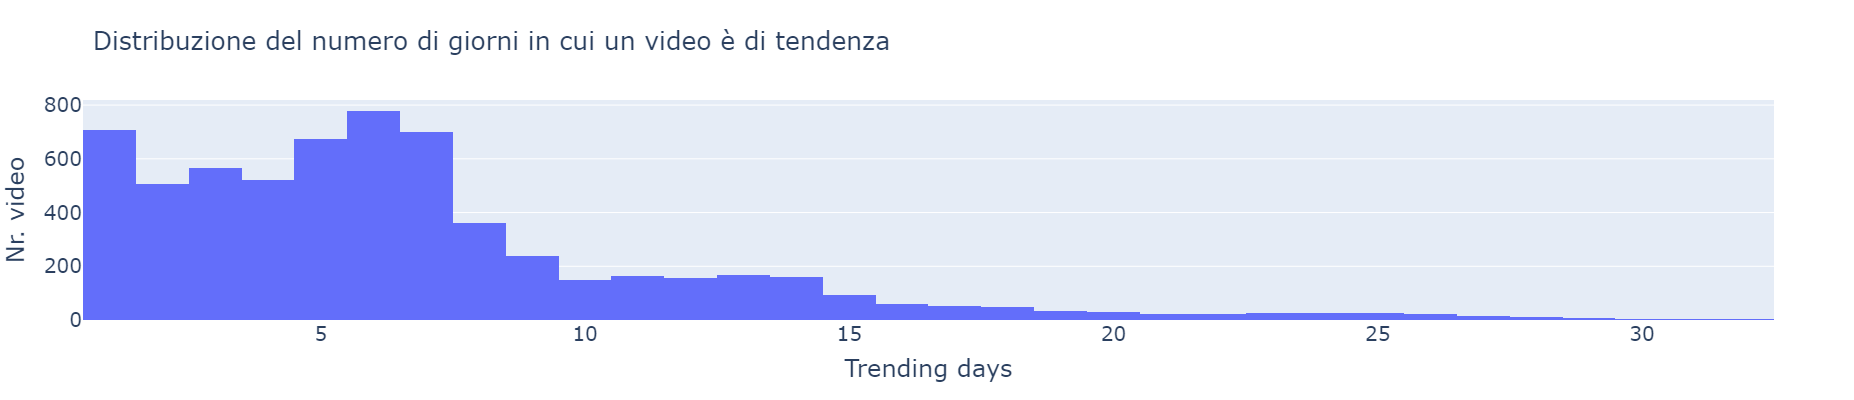

In [9]:
fig = px.histogram(dfl, x="trending_days", title="Distribuzione del numero di giorni in cui un video è di tendenza", height=400)
fig.update_layout(title_font_size = 25, font_size=20, showlegend=False, xaxis_title="Trending days", yaxis_title="Nr. video")

Come già anticipato prima è possibile notare come, nella maggior parte dei casi, un video rimane nella sezione trend per circa una settimana. Tuttavia ci sono dei casi particolari in cui un video rimane nella sezione trend per un mese intero.

In [10]:
dfl.loc[dfl["trending_days"] >= 30, ["title", "channel_title", "category_id", "views", "likes", "dislikes", "trending_days"]]

title         channel_title  \
764   Helping the Police Find a Gun Underwater to So...               DALLMYD   
964         Sam Smith - Pray (Official Video) ft. Logic     SamSmithWorldVEVO   
2167                       I Tried Making Kinetic Sand!               DaveHax   
2305     The Weeknd - Call Out My Name (Official Video)         TheWeekndVEVO   
2910             Nicki Minaj - Chun-Li (Vertical Video)           Nicki Minaj   
4285                                          clickbait                 ProZD   
4571                     Incredibles 2 Official Trailer          Disney•Pixar   
4710  Benedict Cumberbatch, Tom Hiddleston and Tom H...  Good Morning America   
5194  Mirror-Polished Japanese Foil Ball Challenge C...        The Action Lab   

            category_id      views    likes  dislikes  trending_days  
764              Movies    4478472    83646      2674             30  
964               Music   20934803   359012      9294             30  
2167      Howto & Style    1739399    14348      2239             30  
2305              Music  122544931  1427436     40837             31  
2910              Music   22918328   409234     35804             30  
4285  Film & Animations    1800130    90418      1197             32  
4571  Film & Animations   25274694   339824     13824             31  
4710      Entertainment    1270251    26596       348             32  
5194      Entertainment   18726265   167255     27944             32

I titoli dei video che sono stati di tendenza per un mese o più

### Analisi sulla quantità di giorni nella sezione di tendenza rispetto al numero di likes e dislikes

_Ipotesi: i video con più likes rimangono più giorni nella sezione trend rispetto ai video con più dislikes._

Dimostriamo se i video che hanno un numero maggiore di likes che dislikes stanno più tempo nella sezione trend rispetto ai video che hanno più dislikes che likes.

Nel seguente grafico vengono messi in relazione in un box plot i video che hanno un numero di dislikes maggiore rispetto numero di likes (box rosso), e i video che hanno un numero di likes maggiore riespetto al numero di dislikes (box blu).
Sull'asse delle ascisse viene mostrato il numero di giorni.

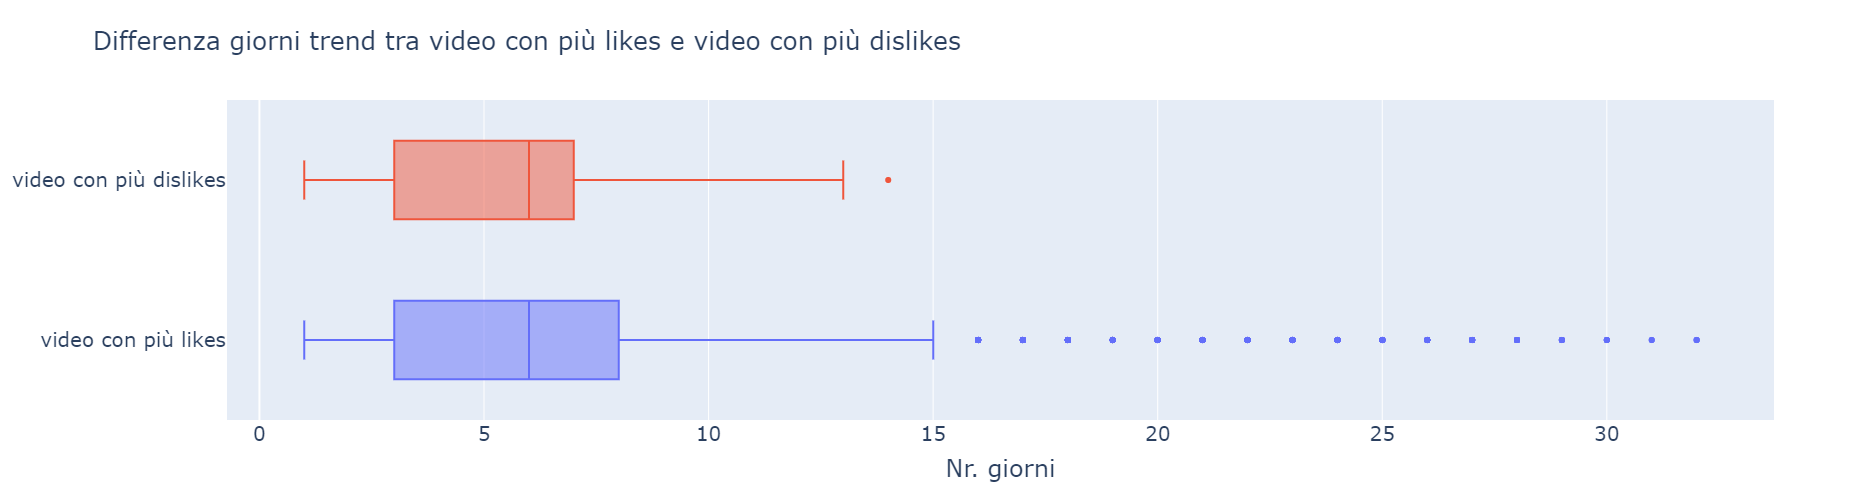

In [11]:
most_likes = dfl.loc[dfl["likes"] > dfl["dislikes"]]
most_dislikes = dfl.loc[dfl["dislikes"] > dfl["likes"]]

data = ([go.Box(x=most_likes["trending_days"], opacity=1, name="video con più likes"),
          go.Box(x=most_dislikes["trending_days"], opacity=1, name="video con più dislikes")])

layout = go.Layout(barmode='overlay')
fig = go.Figure(data, layout)
fig.update_layout(title_text = "Differenza giorni trend tra video con più likes e video con più dislikes", title_font_size = 25, font_size=20,
                 height=500, showlegend=False, legend_font_size=20)
fig.update_xaxes(title="Nr. giorni")
fig.show()

Da quello che viene mostrato dal grafico non è possibile confermale l'ipotesi che i video con un maggior numero di likes rispetto ai dislikes stanno più giorni nella sezione trend. Almeno non in media, poiché solamnte nell'estremo superiore si nota un numero di giorni maggiore e nei punti che stanno all'esterno del box blu. Questo significa che non è detto che i video che hanno un numero maggiore di likes riespetto ai dislikes rimangono più giorni nella sezione trend, ci sono però dei casi particolari di video che (come visto in precedenza) stanno nella sezione trend anche per più di un mese, questi video, come è facilmente immaginabile, hanno un numero di likes maggiore rispetto al numero di dislikes.

## Analisi delle visualizzazioni ottenute nel periodo di tendenza

Di seguito viene analizzato il numero di visualizzazioni ottenute per ogni video per vedere quale categoria ha totalizzato un numero maggiore di visualizzazione nel periodo di tendenza.

Nel grafico sottostante vengono elencate sull'asse delle ordinate il nome della categoria dei video, mentre sull'asse delle ascisse il numero totale di viualizzazioni ottenute.

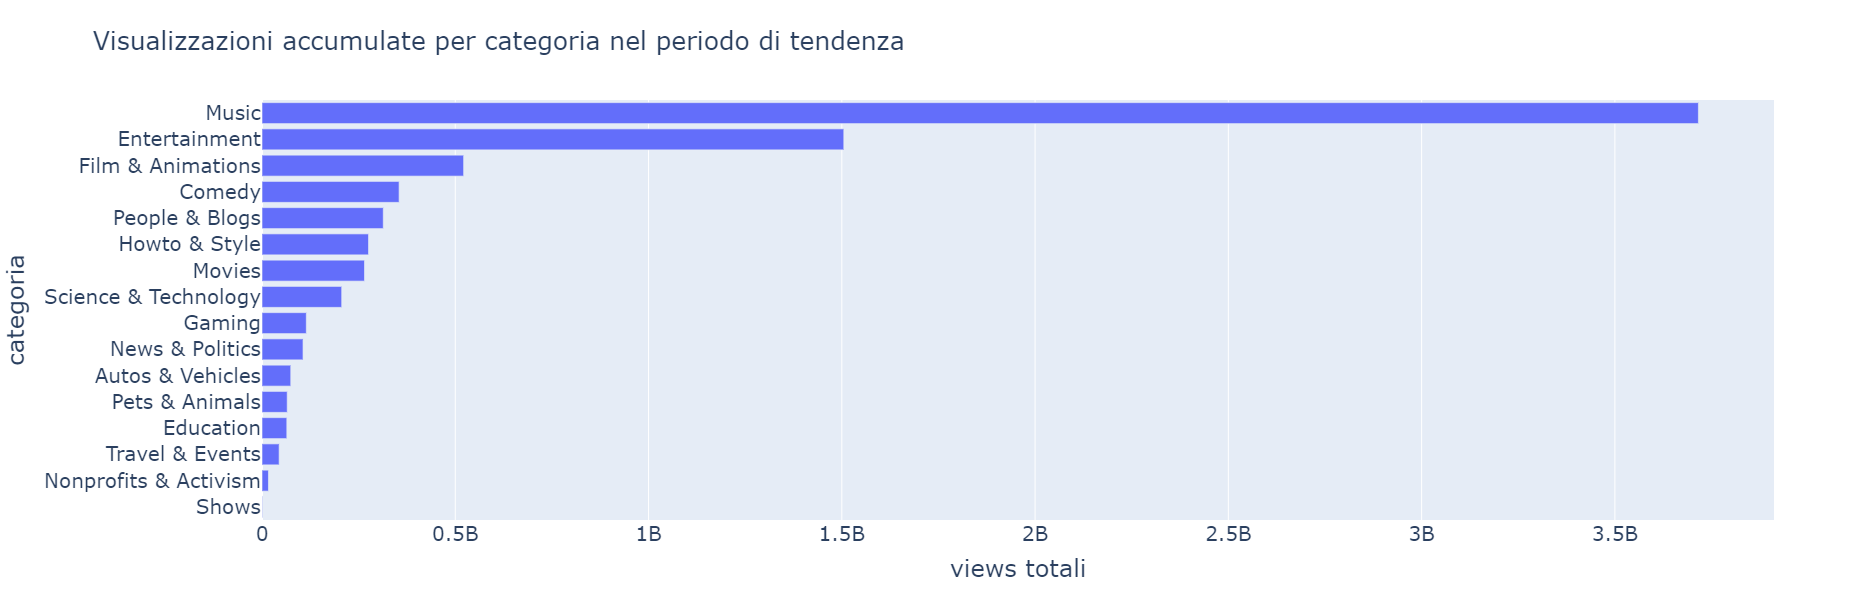

In [12]:
views_delta = dfl.sort_values("views_delta", ascending=False).groupby("category_id").sum()

views_delta = views_delta.sort_values("views_delta")

fig = px.bar(views_delta, y=views_delta.index, x=views_delta["views_delta"], height=500, title="Visualizzazioni accumulate per categoria nel periodo di tendenza", labels={"category_id" : "categoria", "views_delta" : "views totali"})
fig.update_layout(title_font_size = 25, font_size=20,height=600, showlegend=False, legend_font_size=20)

Il grafico mostra che le categorie più visualizzate in assoluto sono "Musica" e "Intrattenimento". In particolare si nota come la categoria "Musica" sia quella che ha totalizzato un numero di visualizzazioni nettamente superiore rispetto alle altre.

Le categorie più gettonate sono quindi soprattutto "Musica", seguita poi da "Intrattenimento".

## Video per anno

Di seguito vengono mostrati gli anni in cui i video vennero caricati sulla piattaforma YouTube della sezione trend presa in analisi. 
Si tratta di un informazione interessante che mostra quanto siano "vecchi" i video presenti nella sezione trend a prescindere dalla loro tendenza.

Il grafico mostra sull'asse delle ordinate il numero di video e sull'asse delle ascisse l'anno dei video

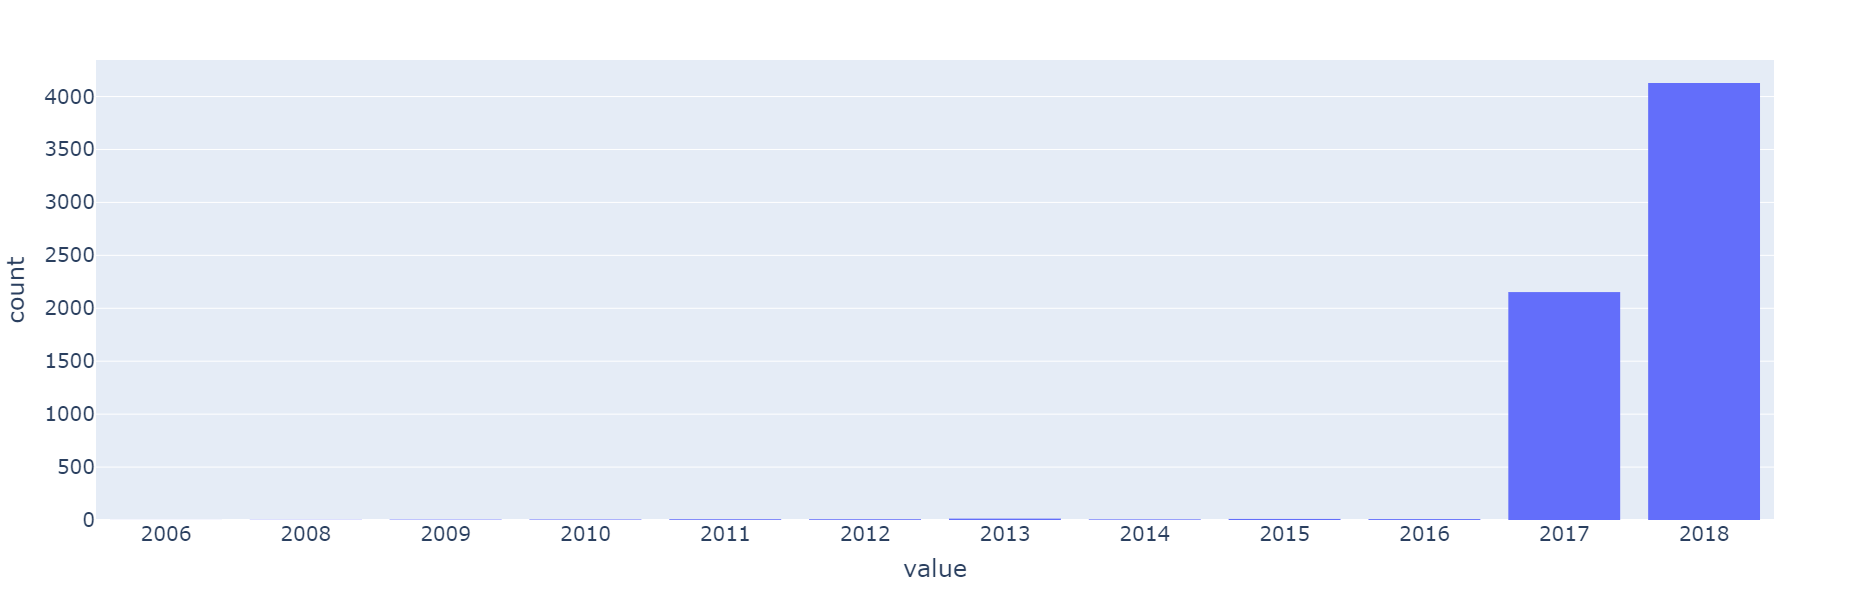

In [13]:
yearList = list()
for year in dfl["publish_time"]:
    yearList.append(year[:4])

yearList.sort()
years = pd.DataFrame(yearList)

fig = px.histogram(yearList)
fig.update_layout(title_font_size = 25, font_size=20,height=600, showlegend=False, legend_font_size=20)

Nonostante la maggior parte dei video rientrino nel periodo di analisi della sezione trend (tra il 2017 e il 2018), alcuni video più datati sono stati trend 10 anni dopo il loro caricamento sulla piattaforma.

Purtroppo le informazioni di questo dataset non forniscono ulteriori informazioni su questi video ma sarebbe interessante, in una possibile analisi futura, capire se questi video sono stati di tendenza anche in altri periodi, se sono diventati famosi solamente 10 anni dopo la loro creazione o se sono tra i video più visti in assoluto sulla piattaforma e che quindi rientrano spesso nei periodi di tendenza.

# Seconda parte (dataset ridotto)

In questa parte di analisi vengono tenute in considerazione solamente le date più recenti per ogni video e verrano analizzate le colonne dei likes, dislikes, commenti e tags.

## Analisi Likes & Dislikes

### Video con più likes

Di seguito viene mostrato il titolo, ed alcune altre informazioni, del video che ha il numero di likes più alto di tutta la sezione trend.

In [14]:
maxLikes = dfl["likes"].max()
dfl.loc[dfl["likes"] == maxLikes]

index     video_id trending_date                                title  \
826  38273  7C2z4GqqS5E    2018-06-01  BTS (방탄소년단) 'FAKE LOVE' Official MV   

    channel_title category_id              publish_time  \
826       ibighit       Music  2018-05-18T09:00:02.000Z   

                                                  tags      views    likes  \
826  BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...  123010920  5613827   

     ...                                  thumbnail_link  comments_disabled  \
826  ...  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   

    ratings_disabled  video_error_or_removed  \
826            False                   False   

                                           description  views_delta  \
826  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...   83660993.0   

    likes_delta  dislikes_delta  comment_count_delta  trending_days  
826   1733756.0        134185.0             536350.0             14  

[1 rows x 22 columns]

### Video con più dislikes

Di seguito viene mostrato il titolo, ed alcune altre informazioni, del video che ha il numero di dislikes più alto di tutta la sezione trend.

In [15]:
maxDislikes = dfl["dislikes"].max()
dfl.loc[dfl["dislikes"] == maxDislikes]

index     video_id trending_date      title     channel_title  \
2797  11323  QwZT7T-TXT0    2018-01-09  So Sorry.  Logan Paul Vlogs   

        category_id              publish_time  \
2797  Entertainment  2018-01-02T16:42:21.000Z   

                                                   tags     views    likes  \
2797  logan paul vlog|"logan paul"|"logan"|"paul"|"o...  37539570  1402578   

      ...                                  thumbnail_link  comments_disabled  \
2797  ...  https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg              False   

     ratings_disabled  video_error_or_removed  description  views_delta  \
2797            False                   False            0   24233965.0   

     likes_delta  dislikes_delta  comment_count_delta  trending_days  
2797    567200.0       1045300.0             628207.0              7  

[1 rows x 22 columns]

## Analisi likes e dislikes in base alla categoria dei video

Di seguito vengono analizzate le categorie dei video in base al numero di likes e dislikes, per capire quali sono le categorie più apprezzate e quali quelle meno apprezzate.

* il primo grafico mostra le categorie che hanno il maggior numero di likes. Sull'asse delle ordinate vengono elencate le categorie e sull'asse delle ascisse il numero totale di likes.

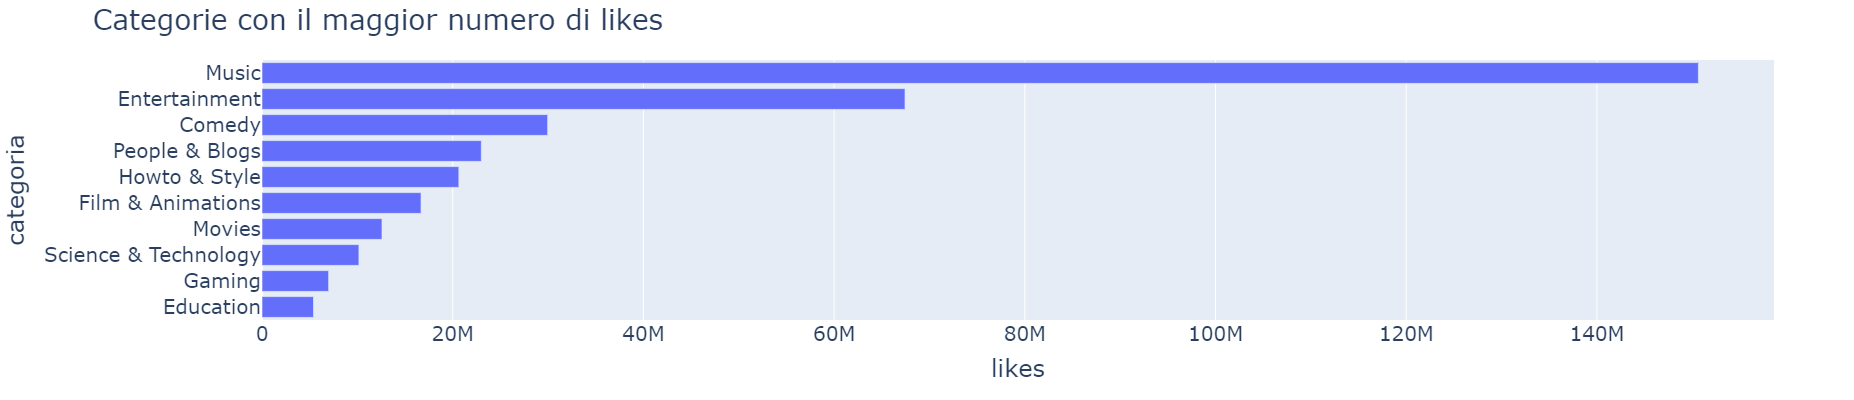

In [16]:
maxlikes = dfl.groupby('category_id').sum().reset_index().sort_values('likes', ascending=True).tail(10)
maxdis = dfl.groupby('category_id').sum().reset_index().sort_values('dislikes', ascending=True).tail(10)

fig1 = px.bar(maxlikes, y=maxlikes["category_id"], x=maxlikes["likes"], labels={"category_id":"categoria"})
fig1.update_layout(title_font_size = 25, font_size=20,height=400, showlegend=False, legend_font_size=20, title="Categorie con il maggior numero di likes")
fig1.show()   

In questo primo grafico si nota che la categoria più apprezzata è la categoria "Musica" seguita da "Intrattenimento".

* Nel secondo grafico mostra le categorie che hanno il maggior numero di dislikes. Anche in questo caso sull'asse delle ordinate vengono elencate le categorie e sull'asse delle ascisse il numero totale di dislikes

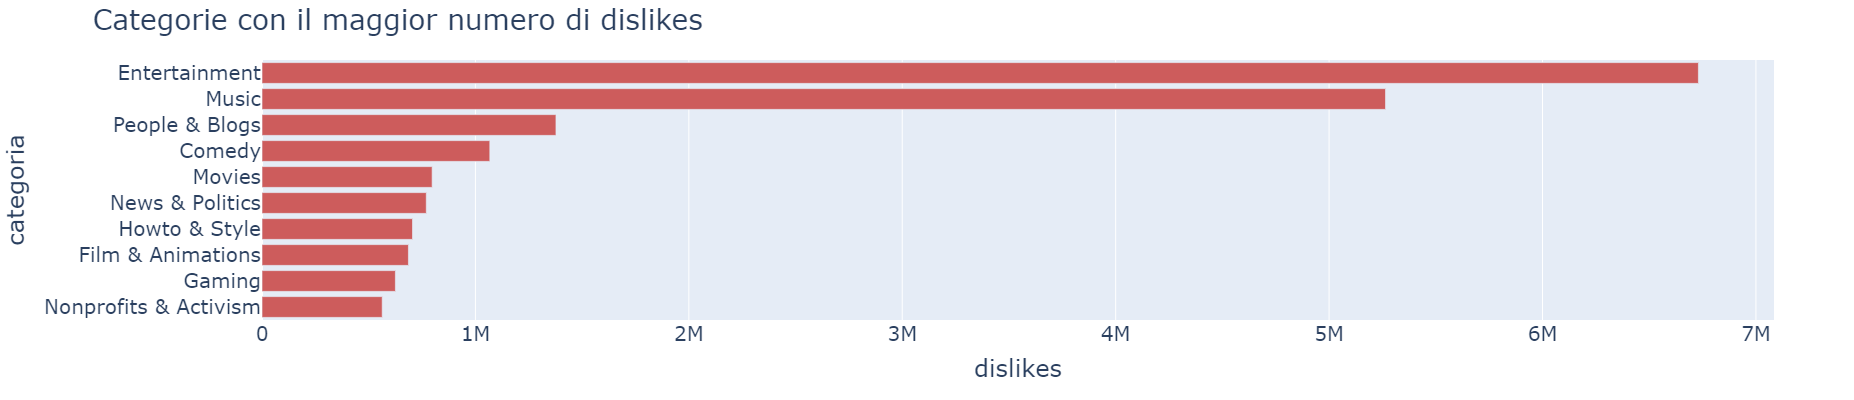

In [17]:
fig2 = px.bar(maxdis, y=maxdis["category_id"], x=maxdis["dislikes"], labels={"category_id":"categoria"}, color_discrete_sequence=['indianred'])
fig2.update_layout(title_font_size = 25, font_size=20,height=400, showlegend=False, legend_font_size=20, title="Categorie con il maggior numero di dislikes")
fig2.show()

Nel secondo grafico si nota che le categorie in testa sono le stesse, tuttavia sono invertite rispetto al primo grafico. La categoria "Intrattenimento" è quella che ha il maggior numero di dislikes, mentre al secondo posto c'è la categoria "Musica". 

Di seguito gli stessi grafici di sopra presentati con degli scatter plot:

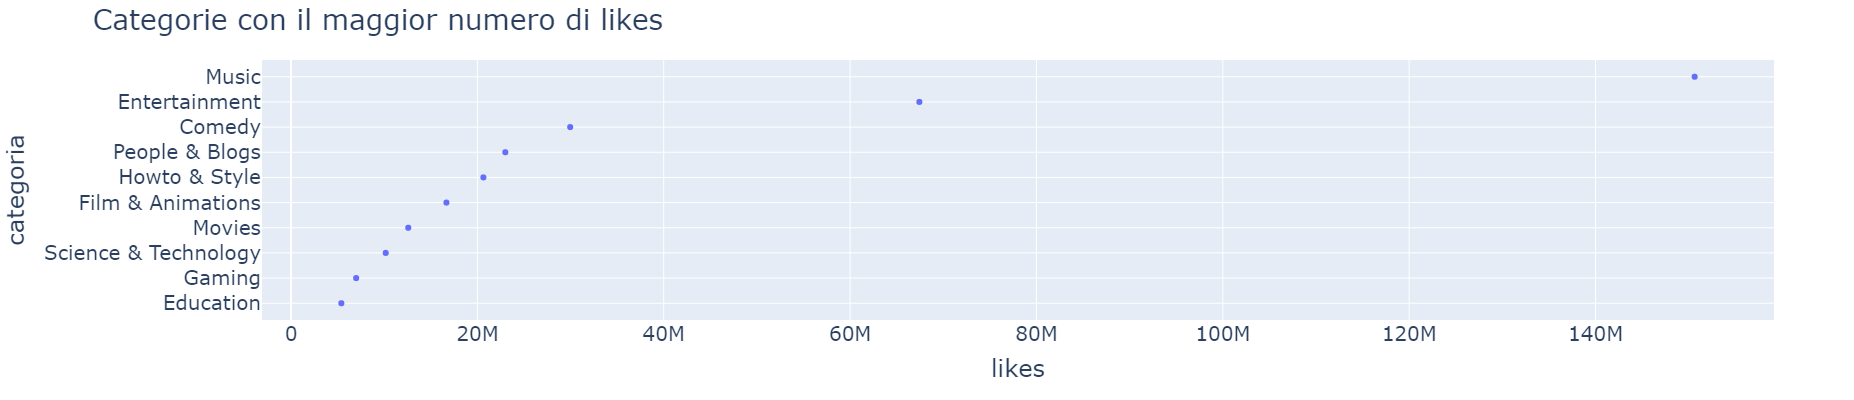

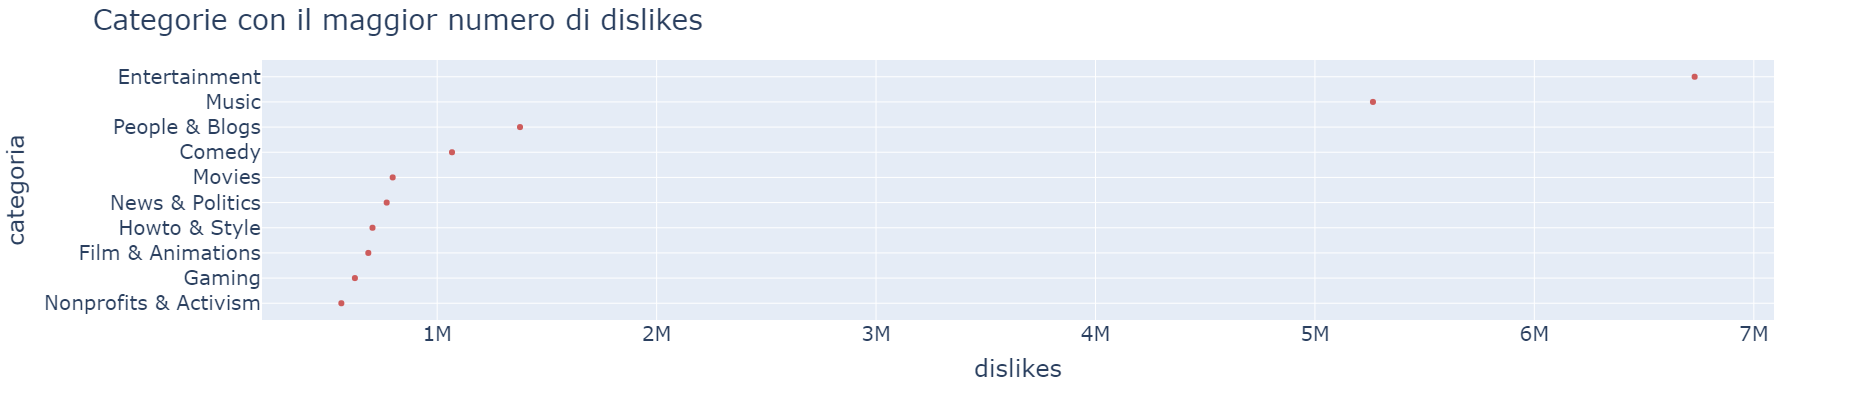

In [18]:
fig1 = px.scatter(maxlikes, y=maxlikes["category_id"], x=maxlikes["likes"], labels={"category_id":"categoria"})
fig1.update_layout(title_font_size = 25, font_size=20,height=400, showlegend=False, legend_font_size=20, title="Categorie con il maggior numero di likes")
fig1.show()
fig2 = px.scatter(maxdis, y=maxdis["category_id"], x=maxdis["dislikes"], labels={"category_id":"categoria"}, color_discrete_sequence=['indianred'])
fig2.update_layout(title_font_size = 25, font_size=20,height=400, showlegend=False, legend_font_size=20, title="Categorie con il maggior numero di dislikes")
fig2.show()

## Analisi della percentuale di likes e dislikes sul numero delle views

Dai grafici precedenti è risultato che la categoria più apprezzata è la categoria "Musica" e la categoria meno apprezzata è "Intrattenimento".

Alla luce di questi risultati è interessante analizzare più nel dettaglio come sono distribuiti il numero di likes e di dislikes per queste due categorie. Per analizzare meglio questi risultati viene calcolata la percentuale di likes e di dislike sul numero delle views. Questi dati andranno a spiegare meglio come sono distribuiti i likes e i dislikes per queste categorie.

Verranno mostrati due grafici sulla percentuale di likes e dislikes rispettivamente per la categoria "Musica" e "Intrattenimento".

* Il primo grafico mostra sull'asse delle ordinate il numero di video e sull'asse delle ascisse la percentuale (di likes e dislikes) sul numero di views. In rosso vengono mostrati i dati sui dislikes e in blu i dati sui likes.

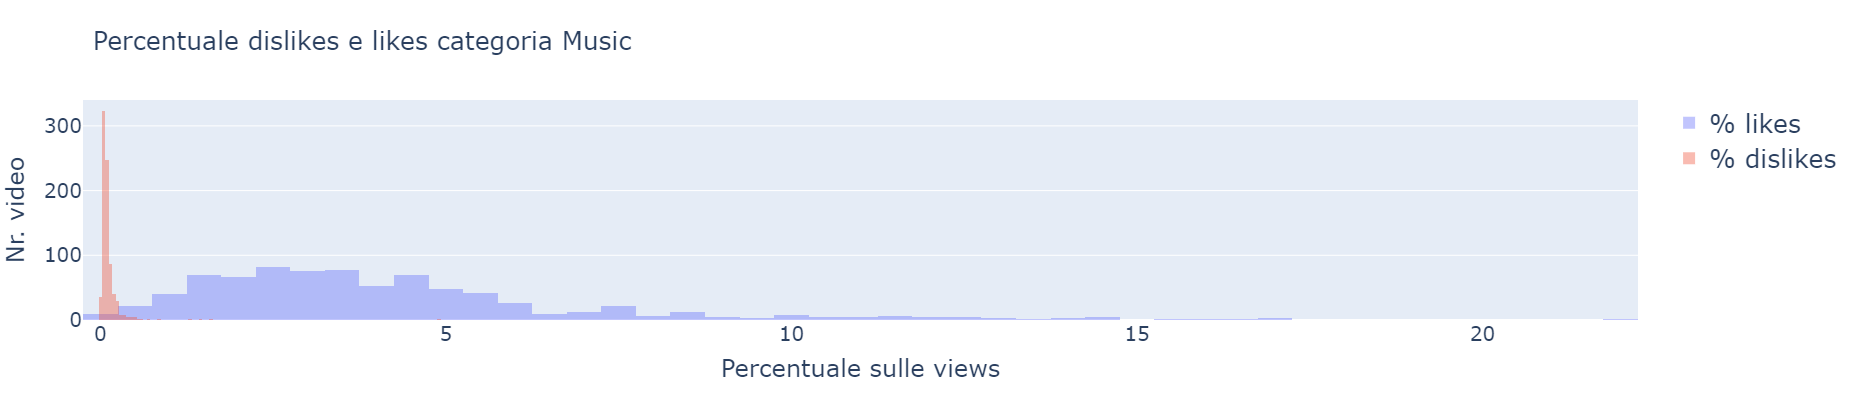

In [19]:
category = "Music"
categoryPlot = dfl.loc[dfl["category_id"] == category, ["category_id","views","likes","dislikes"]]
categoryPlot = categoryPlot.sort_values("views")

categoryPlot["likesPerc"] = categoryPlot.likes / categoryPlot.views * 100
categoryPlot["dislikesPerc"] = categoryPlot.dislikes / categoryPlot.views * 100

data = ( [go.Histogram(x=categoryPlot["likesPerc"], opacity=0.4, name="% likes"),
          go.Histogram(x=categoryPlot["dislikesPerc"], opacity=0.4, name="% dislikes")] )

layout = go.Layout(barmode='overlay')
fig = go.Figure(data, layout)
fig.update_layout(title_font_size = 25, font_size=20 ,height=400, showlegend=True, legend_font_size=25, xaxis_title="Percentuale sulle views", yaxis_title="Nr. video",
                  title_text = "Percentuale dislikes e likes categoria "+category)
fig.show()

# salvo la variabile della figura in una nuova variabile che servirà successivamente
music_percentage = fig

Dal grafico si nota che la maggior parte dei video ha una percentuale molto bassa (attorno allo zero) di dislikes. Questo significa che sostanzialmente la maggior parte dei video ha pochi dislikes rispetto al numero delle views.
La percentuale dei likes invece è più distribuita indicando che generalmente il numero di likes dei video è maggior rispetto al numero di dislikes.

* Nel secondo grafico, similmente al primo, viene mostrata la percentuale di likes e dislikes per la categoria Intrattenimento.

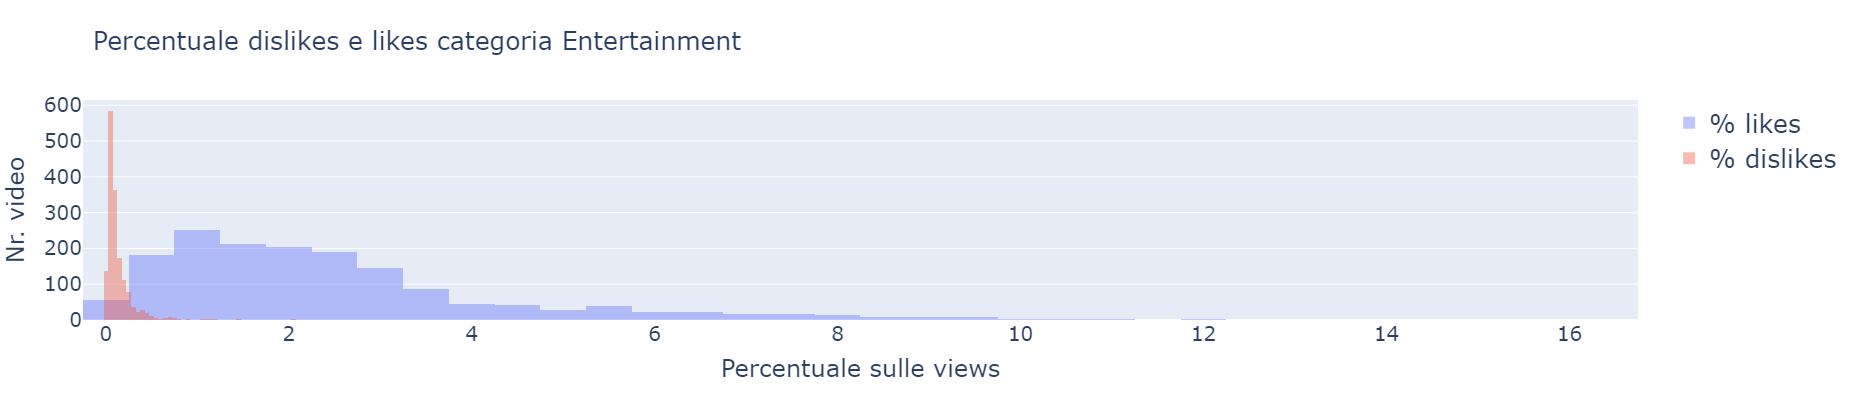

In [20]:
category = "Entertainment"
categoryPlot = dfl.loc[dfl["category_id"] == category, ["category_id","views","likes","dislikes"]]
categoryPlot = categoryPlot.sort_values("views")

categoryPlot["likesPerc"] = categoryPlot.likes / categoryPlot.views * 100
categoryPlot["dislikesPerc"] = categoryPlot.dislikes / categoryPlot.views * 100

data = ( [go.Histogram(x=categoryPlot["likesPerc"], opacity=0.4, name="% likes"),
          go.Histogram(x=categoryPlot["dislikesPerc"], opacity=0.4, name="% dislikes")] )

layout = go.Layout(barmode='overlay')
fig = go.Figure(data, layout)
fig.update_layout(title_font_size = 25, font_size=20 ,height=400, showlegend=True, legend_font_size=25, xaxis_title="Percentuale sulle views", yaxis_title="Nr. video",
                  title_text = "Percentuale dislikes e likes categoria "+category)
fig.show()

Anche in questo caso si nota che la maggior parte dei video ha una percentuale molto bassa di dislikes, tuttavia si notano dei cambiamenti rispetto al grafico di prima e diversi video hanno una percentuale di dislikes leggermente maggiore rispetto alla categoria "Musica". La percentuale di likes invece si comporta in modo molto simile al grafico precedente.

## Analisi sul numero di video trend in relazione con le altre colonne del dataset

### Canali con il maggior numero di video trend

Di seguito un grafico che mostra quali sono i canali che hanno il maggior numero di video della sezione trend.

Il grafico mostra sull'asse delle ordinate il nome del canale e sull'asse delle ascisse il numero di video per canale.

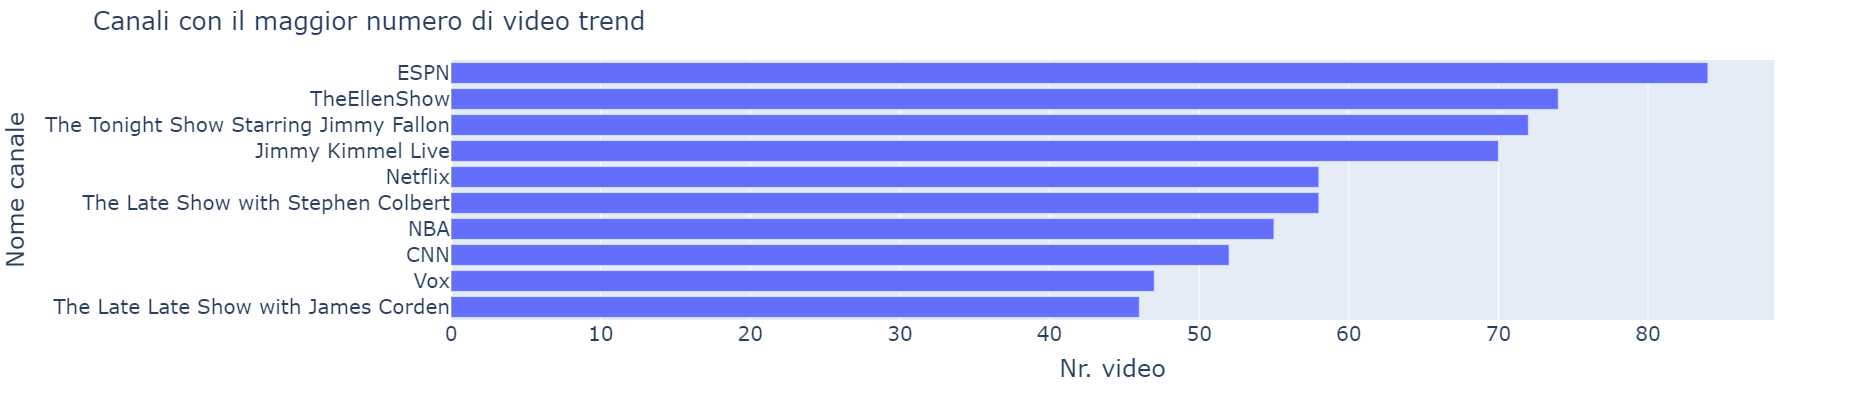

In [21]:
trendChannels = dfl.groupby("channel_title").size().reset_index(name="videos").sort_values("videos", ascending=True).tail(10)
fig = px.bar(trendChannels, x = "videos", y = "channel_title", labels=({"channel_title" : "channel title"}), height=500)
fig.update_layout(title_font_size = 25, font_size=20 ,height=400, showlegend=True, legend_font_size=25, yaxis_title="Nome canale", xaxis_title="Nr. video",
                  title_text = "Canali con il maggior numero di video trend")
fig.show()

### categorie con il maggior numero di video trend

Nel seguente grafico vengono mostrate le categorie che hanno il maggior numero di video di tendenza.

Sull'asse delle ordinate sono elencate le categori e sull'asse delle ascisse il numero di video.

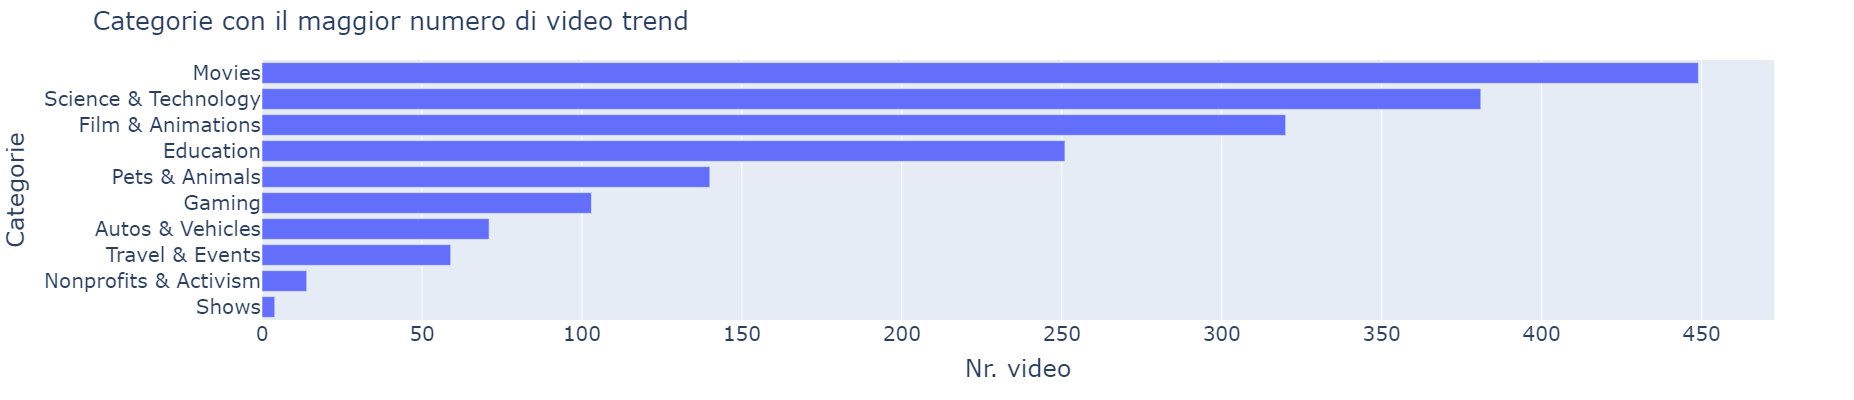

In [22]:
trendCategory = dfl.groupby("category_id").size().reset_index(name="videos").sort_values("videos", ascending=True).head(10)
fig = px.bar(trendCategory, x="videos", y="category_id", labels=({"category_id" : "category"}),height=500)
fig.update_layout(title_font_size = 25, font_size=20 ,height=400, showlegend=True, legend_font_size=25, yaxis_title="Categorie", xaxis_title="Nr. video",
                  title_text = "Categorie con il maggior numero di video trend")
fig.show()

## Analisi sui Commenti

Di seguito alcune analisi sulla colonna commenti del dataset:

### Numero di commenti per video

Nella figura seguente viene rappresentata la distribuzione dei commenti nel dataset aggiornato alle date più recenti per ogni video.

Il grafico mostra sull'asse delle ascisse il numero di commenti e sull'asse delle ordinate il numero di video.

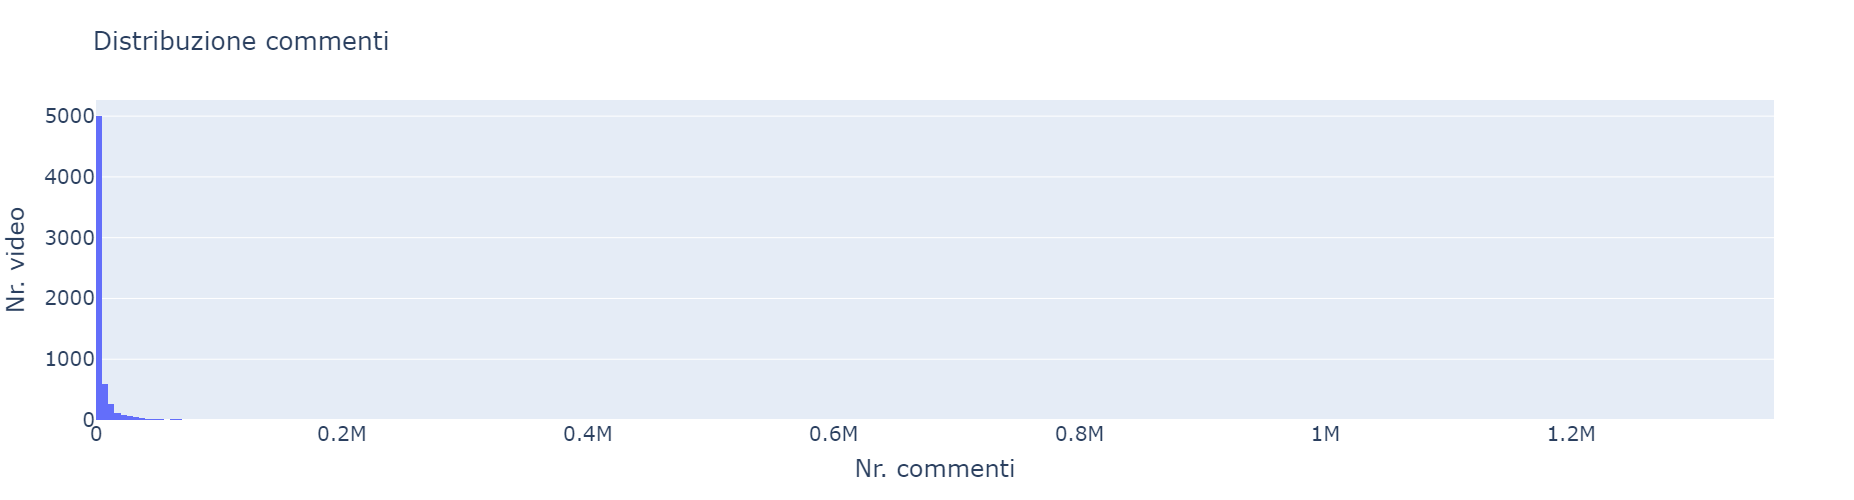

In [23]:
dflComment = dfl["comment_count"]
fig = px.histogram(dflComment, labels={"comment_count":"video count"}, title="Distribuzione commenti")
fig.update_layout(title_font_size = 25, font_size=20 ,height=500, showlegend=False, xaxis_title="Nr. commenti", yaxis_title="Nr. video")

Dal grafico si nota che la maggior parte dei video ha un numero relativamente basso di commenti (da 0 a 5'000). Man mano che il numero di commenti sale il numero di video diminuisce, arrivando ad avere pochi video con un grande numero di commenti. 

Ci sono infatti solamente alcuni casi dove dei video totalizzano più di 1 milione di commenti.

### Categorie con il maggio numero di commenti

Similmente a quanto mostrato prima per il numero di video trend per categoria, nel grafico seguente vengono riportate le categorie che hanno il maggior numero di commenti nei loro video.

Sull'asse delle ordinate vengono elencate le 10 categorie con il maggior numero di commenti, sull'asse delle ascisse il numero totale di commenti per categoria.

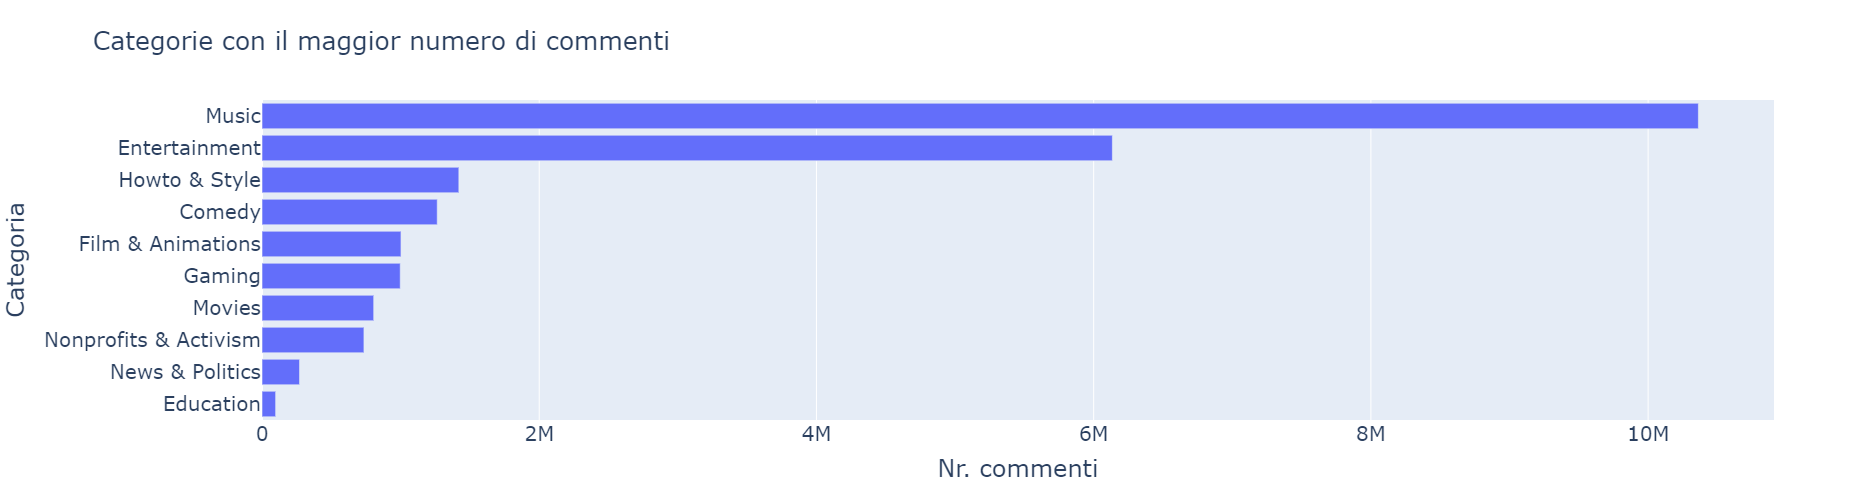

In [24]:
dfComment = dfl.loc[dfl["comment_count"] >= 20_000, ["comment_count", "category_id"]].groupby("category_id").sum().head(10)
dfComment = dfComment.sort_values("comment_count")

fig = px.bar(dfComment, x=dfComment["comment_count"], y=dfComment.index, labels={"comment_count":"comments", "category_id":"category"}, height=500, title="Categorie con il maggior numero di commenti")
fig.update_layout(title_font_size = 25, font_size=20 ,height=500, showlegend=False, xaxis_title="Nr. commenti", yaxis_title="Categoria")
fig.show()

Anche in questo caso si nota che le categorie in testa sono "Musica" e "Intrattenimento", con il primo posto occupato dalla categoria "Musica" che stacca di molto le altre totalizzando un massimo di più di 10 milioni di commenti.

### Numero di video con commenti disabilitati

Sulla piattaforma di video esiste la possibilitià di disattivare la sezine dei commenti per un video. Di seguito viene mostrato il numero di video che ha la sezione dei commenti disabilitata.

In [25]:
cnt = 0;
for i in dfl["comments_disabled"]:
    if(i == True):
       cnt = 1+cnt
       
display(cnt)

105

### Distribuzione commenti disabilitati nell'intero dataset

Andando più nel dettaglio viene mostrata la percentuale di video che ha la sezione dei commenti disabilitata rispetto al numero totale di video presenti nel dataset.

Si tratta di un grafico a torta che mostra, in percentuale, quale sia il totale di video con commenti disabilitati (parte rossa) e quale sia la percentuale di video con la sezione commenti abilitata (parte blu).

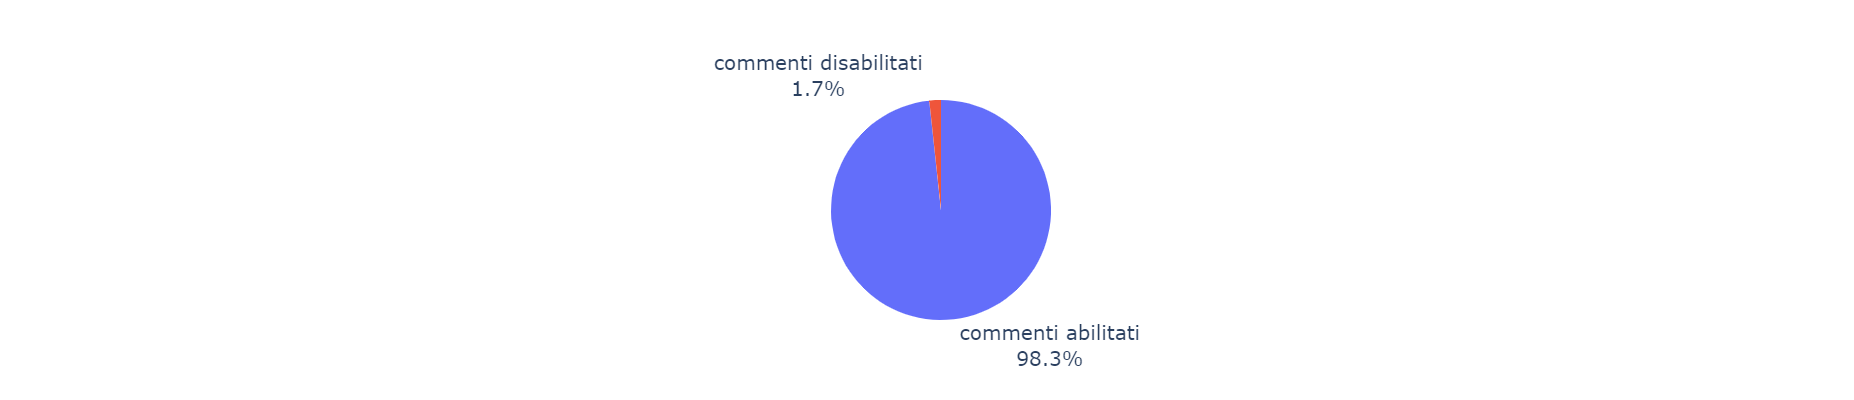

In [26]:
(enabled, disabled) = dfl["comments_disabled"].value_counts()

total = enabled + disabled
enabled = float(enabled) / total * 100
disabled = float(disabled) / total * 100

disabled = str(round(disabled,1))

labels = ["commenti abilitati", "commenti disabilitati"]
values = [enabled, disabled]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(textposition='outside', textinfo='label+percent', )
fig.update_layout(showlegend=False, title_font_size = 25, font_size=20, height=400)
fig.show()

La percentuale di video che non lascia inserire commenti è piuttosto bassa all'interno del dataset, risulta essere meno del 2% del totale dei video. Rimuovere la possibilità di inserire commenti è un'opzione che viene usata piuttosto raramente.

### Titoli di alcuni dei video con commenti disabilitati

Di seguito alcune informazioni su dieci video che hanno la sezione dei commenti disabilitata, si noti che i video hanno infatti un contatore di commenti uguale a zero.

In [27]:
dfl.loc[dfl["comments_disabled"] == True, ["title", "views", "likes", "dislikes", "category_id", "comment_count"]].head(10)

title    views   likes  \
131  Speechless Thoughts with Charles Barkley - Clo...  1675909    6873   
138                          Wallaby on Harbour Bridge    13458      38   
161  DJ Khaled, Rihanna - Wild Thoughts (2018 Live ...  3014847   42556   
164     PBS NewsHour Weekend full episode Dec. 2, 2017    22186     168   
231                        Southwest Florida Eagle Cam   258887    2046   
275                             Holiday — Sway — Apple  4979612   46680   
340  Mo Salah bursts through wall to surprise kids ...  4544350  108091   
383                                  A Magical Holiday   534291    4993   
400      HomePod — Welcome Home by Spike Jonze — Apple  7365395   98457   
425  WATCH LIVE: Florida Gov. Rick Scott announcing...    11692     145   

     dislikes           category_id  comment_count  
131      7029     Film & Animations              0  
138        14      Autos & Vehicles              0  
161      2791                 Music              0  
164        22       News & Politics              0  
231       184        Pets & Animals              0  
275     11703  Science & Technology              0  
340      1922                Movies              0  
383       181         Entertainment              0  
400     17797  Science & Technology              0  
425        79       News & Politics              0

### Categorie dei video con commenti disabilitati

Per capire meglio a quali tipi di video viene disattivata la sezione dei commenti, viene mostrato un grafico che elenca le dieci categorie che hanno il maggior numero di commenti disabilitati. L'ipotesi è che siano argomenti o generi sensibili nei quali è stata tolta la possibilità di commentare i video.

Il grafico mostra sull'asse delle ordinate il nome delle categorie e sull'asse delle ascisse il numero di video con commenti disabilitati.

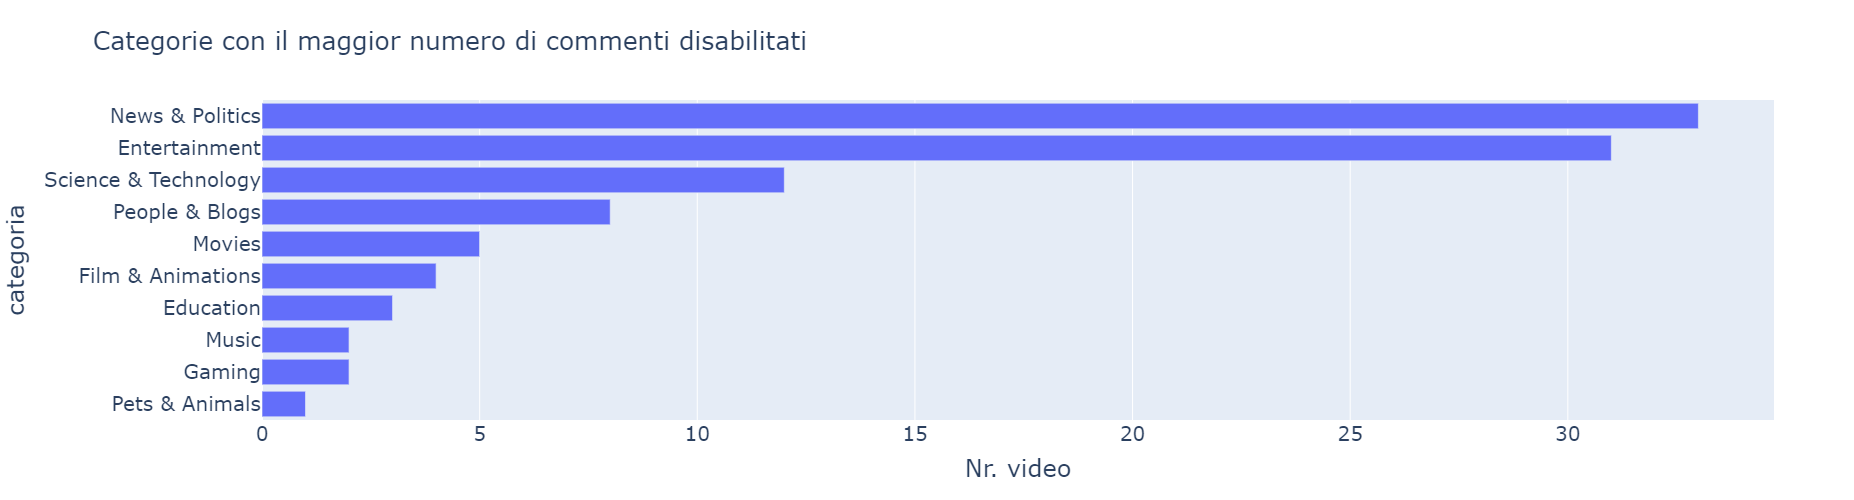

In [28]:
dfDisabled = dfl.loc[dfl["comments_disabled"], ["category_id", "comments_disabled"]].groupby("category_id").sum()

dfDisabled = dfDisabled.sort_values("comments_disabled").tail(10)

fig = (px.bar(dfDisabled, x="comments_disabled", y=dfDisabled.index, 
                    labels={"category_id":"categoria","comments_disabled":"Nr. video"}, height=500, title="Categorie con il maggior numero di commenti disabilitati"))
fig.update_layout(title_font_size = 25, font_size=20 ,height=500, showlegend=False)
fig.show()

Dal grafico si nota che le categorie che spiccano maggiormente con il maggior numero di commenti disabilitati sono: in prima positione "Notizie e Politica" e in seconda posizione "Intrattenimento".

È interessante notare che anche in questa analisi, come nelle precedeni, ci sono sempre due categorie che si differenziano particolarmente dalle altre con valori maggiori.

### Analisi della percentuale di likes e dislikes nei video con commenti disabilitati

Per analizzare più nel dettaglio come sono caratterizzati i video con commenti disabilitati viene riproposta l'analisi sulla percentuale di likes e dislikes sui video con commenti disabilitati.

In questo caso verranno prese le due categorie con il maggior numero di video con la sezione dei commenti disabilitata per capire come sono distribuiti i likes e i dislikes.

I motivi principali per mettere un like ad un video possono essere molteplici: 
* Esprimere il supporto per un canale o uno "YouTuber" in particolare;
* "Premiare" la qualità di un video;
* Il video ha aiutato in qualche modo (si pensi ai tutorial o gli "how to");
* il video era divertente e ha fatto ridere. 

È possibile che un video piaccia ma nei commenti venga lasciata una critica costruttiva all'autore del video. 

L'ipotesi è che in assenza di una sezione dei commenti, l'unico modo in cui un utente può lasciare un feedback è attraverso un like o un dislike. In questo caso, a prescindere dalla qualità di un video, l'utente esprime la sua reazione in modo positivo o negativo. La distribuzione dei likes e dei dislikes potrebbe quindi essere diversa da quanto visto in precedenza.

Nei grafici viene mostrata la quantità di video sull'asse delle ordinate e la percentuale di likes (blu) e di dislikes (rosso) sull'asse delle ascisse.

_Nota: Per comodità viene riportato il grafico sulla percentuale dei likes e dei dislikes della caterogia "Musica" mostrato in precedenza adando a limitare i valori dell'asse delle ascisse per mostrare la differenza con l'analisi attuale_

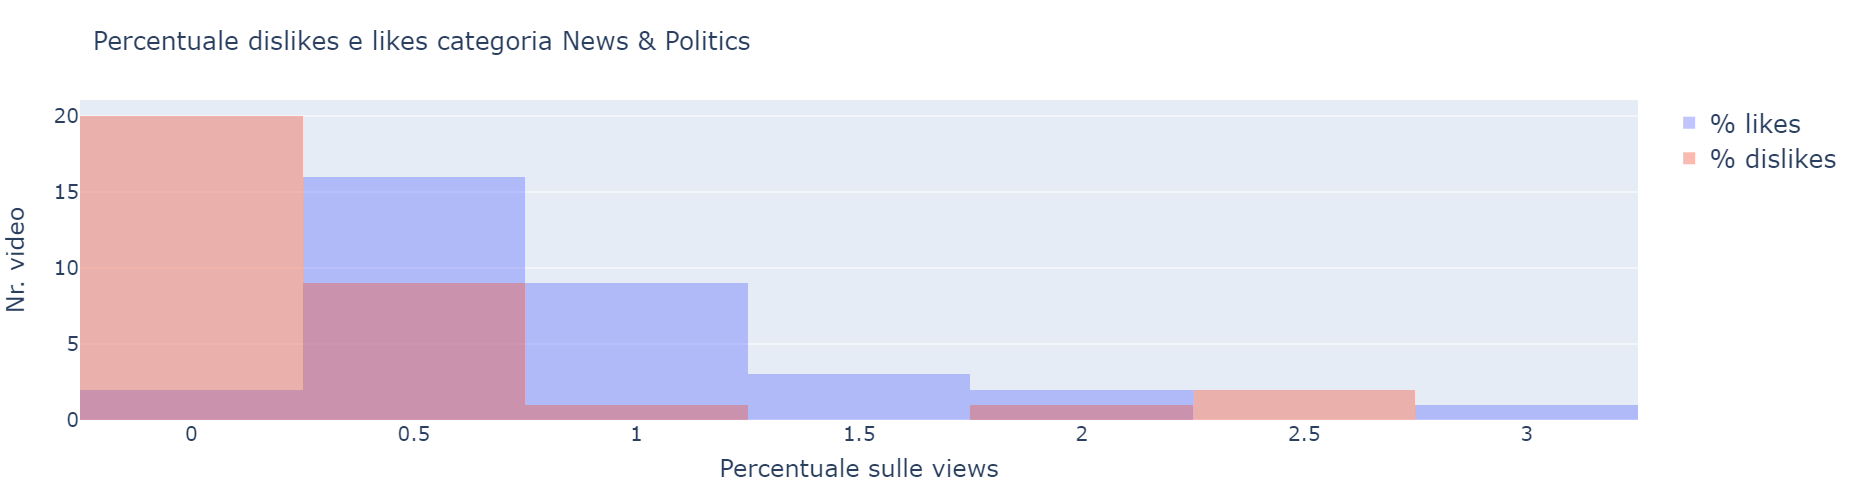

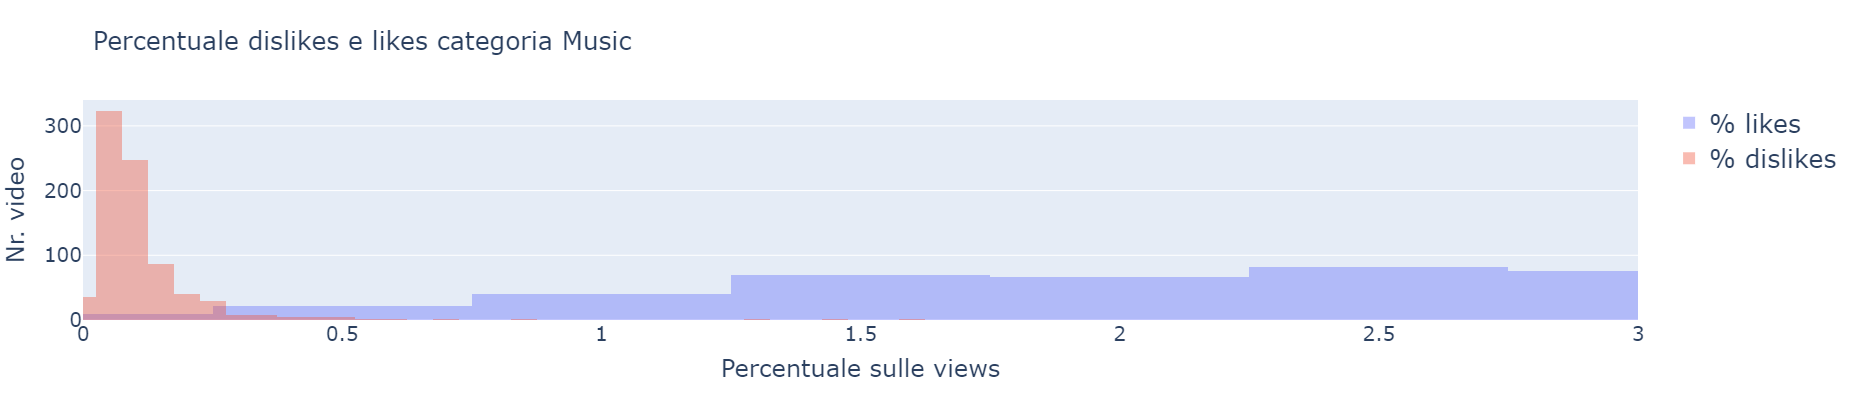

In [29]:
dfNewsAndPolitics = (dfl.loc[dfl["category_id"] == "News & Politics"])
dfNewsAndPolitics = (dfNewsAndPolitics.loc[dfNewsAndPolitics["comments_disabled"] == True])

dfNewsAndPolitics["likesPerc"] = dfNewsAndPolitics["likes"] / dfNewsAndPolitics["views"] * 100
dfNewsAndPolitics["dislikesPerc"] = dfNewsAndPolitics["dislikes"] / dfNewsAndPolitics["views"] * 100

data = ( [go.Histogram(x=dfNewsAndPolitics["likesPerc"], opacity=0.4, name="% likes"),
          go.Histogram(x=dfNewsAndPolitics["dislikesPerc"], opacity=0.4, name="% dislikes")] )

layout = go.Layout(barmode='overlay')
fig = go.Figure(data, layout)
fig.update_layout(title_font_size = 25, font_size=20 ,height=500, showlegend=True, legend_font_size=25, xaxis_title="Percentuale sulle views", yaxis_title="Nr. video",
                  title_text = "Percentuale dislikes e likes categoria News & Politics")
fig.show()

# adattamento del grafico precedente per analisi con quello attuale
music_percentage = music_percentage.update_xaxes(range=(0,3))
music_percentage.show()

Dal grafico si nota che c'è una leggera variazione da come era distribuita la percentuale di likes e dislikes nell'analisi fatta sulla categoria "Musica". Si nota infatti che la percentuale di dislikes raggiunge valori maggiori rispetto a prima dove non raggiungeva mai il 2%.

#### Titoli dei video con percentuale di dislikes alta

Per avere un'idea e qualche informazione in più sui video che hanno una percentuale maggiore di dislikes, vengono elencati i tre video col maggior numero di dislikes e commenti disabilitati.

In [30]:
pd.options.display.max_colwidth = 200
videos = dfNewsAndPolitics.loc[dfNewsAndPolitics["dislikesPerc"] >= 1.75, ["title", "views", "likes", "dislikes"]]
videos.sort_values("dislikes", ascending = False)

title  \
5770  Roy Moore Delivers Concession Speech From Alabama (Full) | NBC News   
2407           WATCH: Trump sexual misconduct accusers hold news briefing   
3020                Women's March Rallies From Around The U.S. | NBC News   

       views  likes  dislikes  
5770  201025    625      4786  
2407   57770    817      1478  
3020   44121    888       833

In questi video si nota che, a parte l'ultimo caso, il numero di dislikes è nettamente maggiore rispetto al numero likes.

#### Analisi più generale sui likes e dislikes nei video con commenti disabilitati.

Per capire se il fatto che la percentuale di dislikes sia effettivamente diversa in assenza di commenti e che non sia solamente un caso quello della categoria "Notizie e Politica", la stessa analisi viene ripetuta su tutti i video con la sezione commenti disabilitata e viene comparata con tutti i video che invece hanno i commenti abilitati.

I seguenti grafici mostrano la distribuzione della percentuale di likes e di dislikes prima su tutti i video che hanno la sezione dei commenti disabilitati e poi su tutti i video che hanno la sezione commenti abilitata.

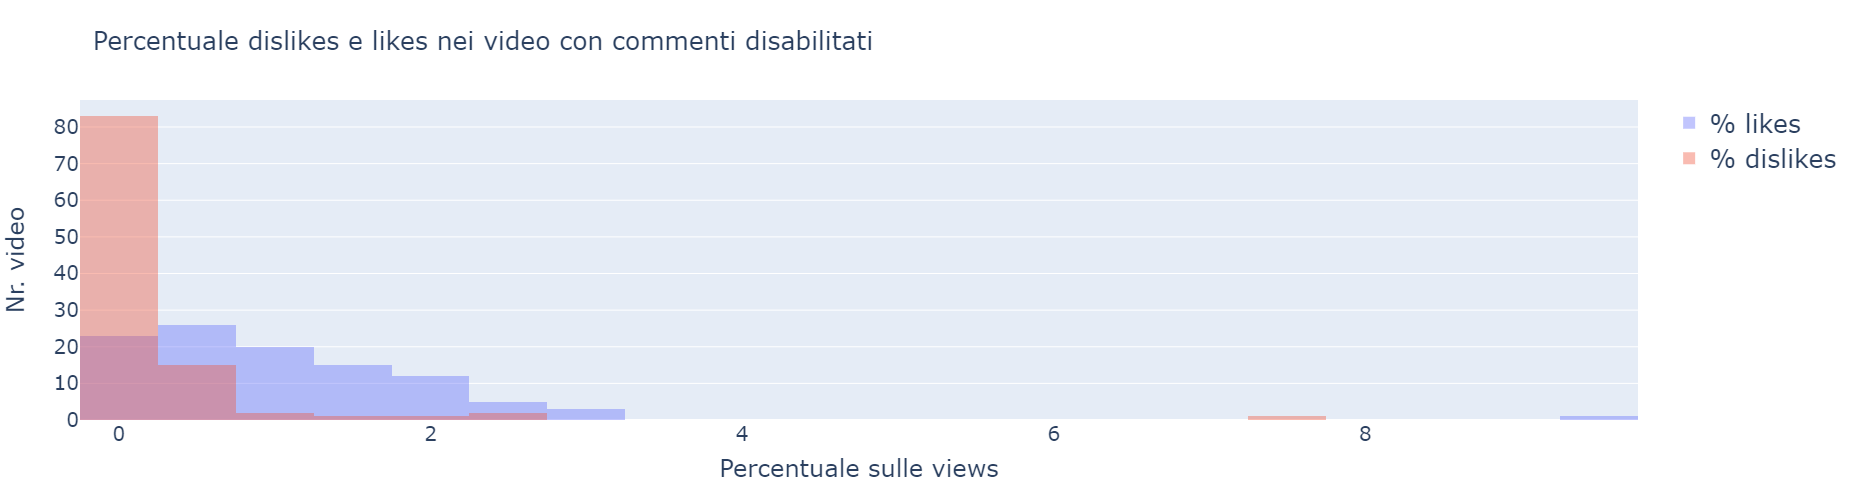

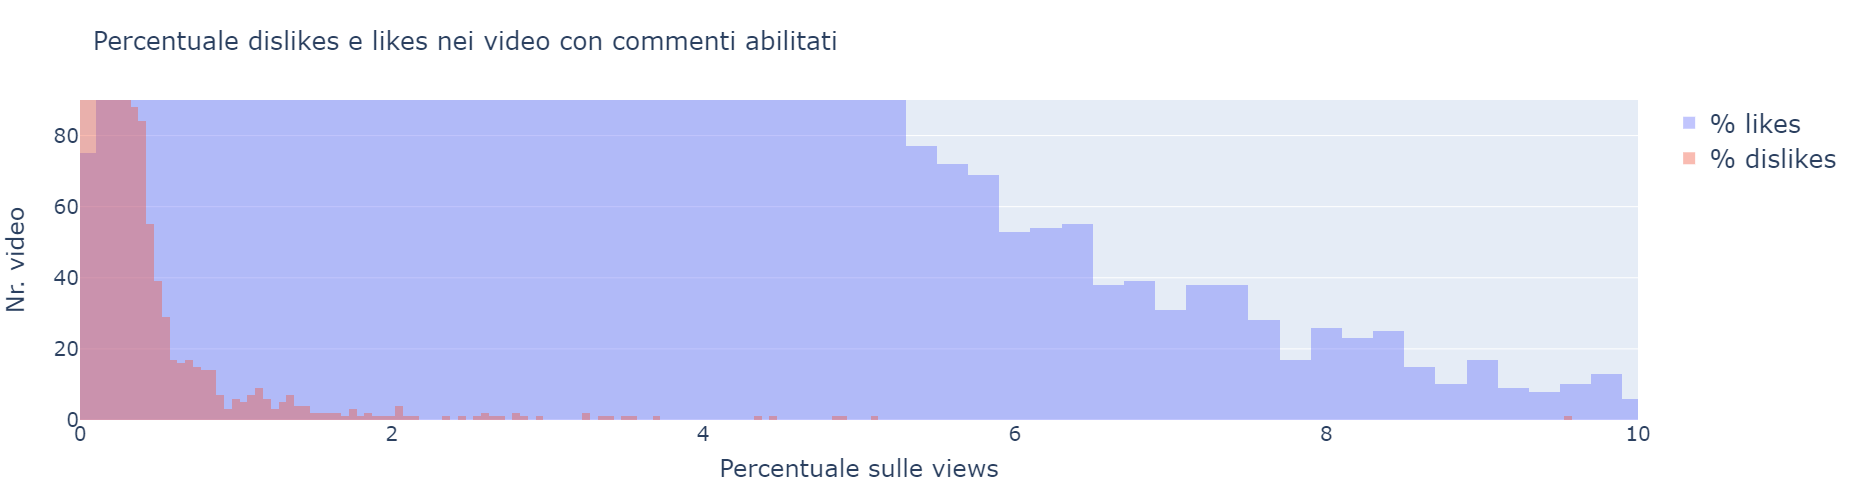

In [31]:
# Nuovo dataset contenente solo i video con commenti disabilitati
no_comments = dfl.loc[dfl["comments_disabled"] == True, ["title","views","likes","dislikes"]]

no_comments["likesPerc"] = no_comments.likes / no_comments.views * 100
no_comments["dislikesPerc"] = no_comments.dislikes / no_comments.views * 100

data = ( [go.Histogram(x=no_comments["likesPerc"], opacity=0.4, name="% likes"),
          go.Histogram(x=no_comments["dislikesPerc"], opacity=0.4, name="% dislikes")] )

layout = go.Layout(barmode='overlay')
fig1 = go.Figure(data, layout)
fig1.update_layout(title_font_size = 25, font_size=20 ,height=500, showlegend=True, legend_font_size=25, xaxis_title="Percentuale sulle views", yaxis_title="Nr. video",
                  title_text = "Percentuale dislikes e likes nei video con commenti disabilitati")
fig1.show()

# Nuovo dataset contenente solo i video con commenti abilitati
comments = dfl.loc[dfl["comments_disabled"] == False, ["title","views","likes","dislikes"]]

comments["likesPerc"] = comments.likes / comments.views * 100
comments["dislikesPerc"] = comments.dislikes / comments.views * 100

data = ( [go.Histogram(x=comments["likesPerc"], opacity=0.4, name="% likes"),
          go.Histogram(x=comments["dislikesPerc"], opacity=0.4, name="% dislikes")] )

layout = go.Layout(barmode='overlay')
fig2 = go.Figure(data, layout)
fig2.update_layout(title_font_size = 25, font_size=20 ,height=500, showlegend=True, legend_font_size=25, xaxis_title="Percentuale sulle views", yaxis_title="Nr. video",
                  title_text = "Percentuale dislikes e likes nei video con commenti abilitati")
fig2.update_xaxes(range=(0,10))
fig2.update_yaxes(range=(0,90))
fig2.show()

Dal momento che i video con la sezione dei commenti abilitata sono molti più dei video con commenti disabilitati è stato preso in considerazione un range del grafico minore per poter comparare meglio i risultati.

L'ipotesi che in assenza di commenti la percentuale di likes e dislikes sia particolarmente diversa dal normale è da smentire. Si nota infatti che la percentuale di likes e dislikes non è diversa dai video che hano la sezione dei commenti abilitata.

Si notano infatti alcuni video che hanno la sezione commenti abilitata ma una percentuale di dislikes che può arrivare intorno al 5%.

## Tags

Una breve analisi su quali sono i tags più utilizzati tra i video della sezione trend.

### Tags più comuni

Nel grafico che segue vengono elencati in ordine decrescente quali sono i tags più presenti tra i video del dataset.

Il grafico mostra sull'asse delle ordinate il numero di volte che un determinato tag compare tra i video, mentre sull'asse delle ascisse il nome dei dieci tag più utilizzati.

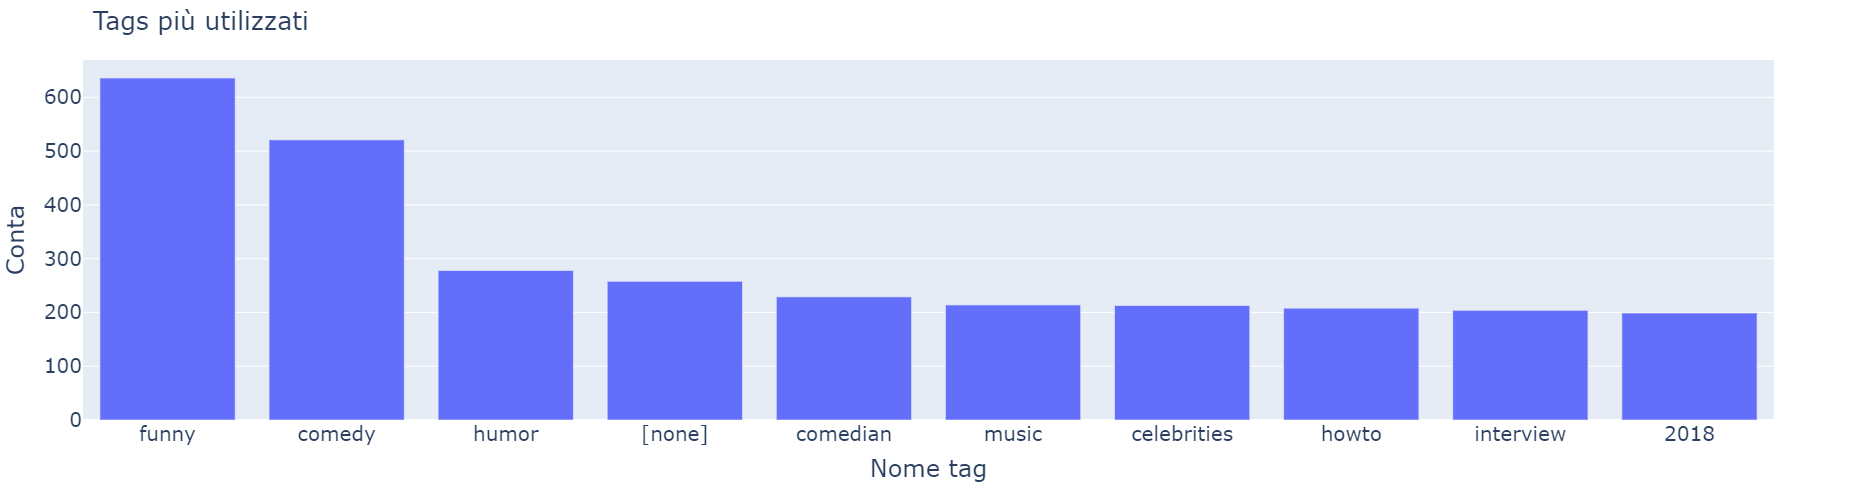

In [32]:
genre_columns = dfl.tags.str.replace('"', ' ').str.replace('#', ' ').str.split('|', expand = True)
fav_tags = genre_columns.stack().str.replace(' ','').value_counts()

fav_tags.head(10)
fig = px.bar(fav_tags.head(10))
fig.update_layout(title_font_size = 25, font_size=20 ,height=500, showlegend=False, legend_font_size=25, xaxis_title="Nome tag", yaxis_title="Conta",
                  title_text = "Tags più utilizzati")
fig.show()

I tag più utilizzati fanno riferimento a video che sono molto probabilmente della categoria "Intrattenimento", questo non sorprende dal momento che è una tra le due categorie più gettonate.

I tags della musica essendo meno generici tra loro non appaiono se non un semplice tag "music".

# Conclusioni
Dalle analisi che sono state fatte sul dataset è possibile concludere che tra i video di maggior tendenza le categorie maggiormente visualizzate sono "Musica" e "Intrattenimento". 

Nonostante l'utilizzo sempre maggiore di altri servizi di streaming di musica come Spotify e servizi di intrattenimento video come Netflix, YouTube rimane molto popolare per l'ascolto di musica e visualizzazione di video divertenti. Questo può essere dovuto al fatto che al contrario delle altre due piattaforme citate, YouTube rimane una piattaforma gratuita per l'utenza.

L'ipotesi iniziale sull'assenza di commenti che porta gli utenti ad esprimere maggiormente il loro feedback attraverso l'uso di likes e dislikes è stata smentita. Tuttavia si può confermare il fatto che nella maggior parte dei casi i video ottengono più likes che dislikes.

Trattandosi di una piccola sezione di YouTube non è possibile confermare che le analisi fatte si rispecchino in generale all'interno dell'intera piattaforma, poiché la sezione trend comprende una piccolissima parte di quella che è l'enorme contenuto video di YouTube.